In [1]:
# 1. 데이터 분석 위한 pandas, 수치계산 위한 numpy
#    시각화 위한 seaborn, matplotlib.pyplot

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [31]:
# 2. 데이터 셋 불러오기
#    데이터 셋을 jupyter lab과 같은 경로에 저장하는걸 추천

df = pd.read_csv("C:/Users/alexj/CODE ScikitLearn/Telco_Customer_Churn.csv", index_col = "customerID")

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null 

In [32]:
df.head()

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
customerID                                                                  
7590-VHVEG  Female              0     Yes         No       1           No   
5575-GNVDE    Male              0      No         No      34          Yes   
3668-QPYBK    Male              0      No         No       2          Yes   
7795-CFOCW    Male              0      No         No      45           No   
9237-HQITU  Female              0      No         No       2          Yes   

               MultipleLines InternetService OnlineSecurity OnlineBackup  \
customerID                                                                 
7590-VHVEG  No phone service             DSL             No          Yes   
5575-GNVDE                No             DSL            Yes           No   
3668-QPYBK                No             DSL            Yes          Yes   
7795-CFOCW  No phone service             DSL            Yes           No   
9237-HQITU                No     Fiber optic             No           No   

           DeviceProtection TechSupport StreamingTV StreamingMovies  \
customerID                                                            
7590-VHVEG               No          No          No              No   
5575-GNVDE              Yes          No          No              No   
3668-QPYBK               No          No          No              No   
7795-CFOCW              Yes         Yes          No              No   
9237-HQITU               No          No          No              No   

                  Contract PaperlessBilling              PaymentMethod  \
customerID                                                               
7590-VHVEG  Month-to-month              Yes           Electronic check   
5575-GNVDE        One year               No               Mailed check   
3668-QPYBK  Month-to-month              Yes               Mailed check   
7795-CFOCW        One year               No  Bank transfer (automatic)   
9237-HQITU  Month-to-month              Yes           Electronic check   

            MonthlyCharges TotalCharges Churn  
customerID                                     
7590-VHVEG           29.85        29.85    No  
5575-GNVDE           56.95       1889.5    No  
3668-QPYBK           53.85       108.15   Yes  
7795-CFOCW           42.30      1840.75    No  
9237-HQITU           70.70       151.65   Yes

In [33]:
# !!!전처리!!!
# TotalCharges를 실수형 데이터로 변환하기
# df['TotalCharges'] = df['TotalCharges'].astype(float)  --> 공백이 있기 때문에 오류남 --> 공백을 제거해주자

df['TotalCharges'] = df['TotalCharges'].replace(' ', pd.NA)   # 공백을 NAN(Not A NUmber)로 변환
df.dropna(subset = ['TotalCharges'], inplace=True)            # NAN 제거

df.TotalCharges = df.TotalCharges.astype(float)               # TotalCharges 열을 실수형 데이터로 변환
df.TotalCharges.dtype

dtype('float64')

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null 

In [35]:
# object columns 중 yes no 만 포함된 열 추출하기

object_columns = df.select_dtypes(include=['object']).columns.tolist()

for column in object_columns:
        if not ((df[column] == 'Yes') | (df[column] == 'No')).all():
                df.drop(column, axis=1, inplace=True)
df

SeniorCitizen Partner Dependents  tenure PhoneService  \
customerID                                                          
7590-VHVEG              0     Yes         No       1           No   
5575-GNVDE              0      No         No      34          Yes   
3668-QPYBK              0      No         No       2          Yes   
7795-CFOCW              0      No         No      45           No   
9237-HQITU              0      No         No       2          Yes   
...                   ...     ...        ...     ...          ...   
6840-RESVB              0     Yes        Yes      24          Yes   
2234-XADUH              0     Yes        Yes      72          Yes   
4801-JZAZL              0     Yes        Yes      11           No   
8361-LTMKD              1     Yes         No       4          Yes   
3186-AJIEK              0      No         No      66          Yes   

           PaperlessBilling  MonthlyCharges  TotalCharges Churn  
customerID                                                       
7590-VHVEG              Yes           29.85         29.85    No  
5575-GNVDE               No           56.95       1889.50    No  
3668-QPYBK              Yes           53.85        108.15   Yes  
7795-CFOCW               No           42.30       1840.75    No  
9237-HQITU              Yes           70.70        151.65   Yes  
...                     ...             ...           ...   ...  
6840-RESVB              Yes           84.80       1990.50    No  
2234-XADUH              Yes          103.20       7362.90    No  
4801-JZAZL              Yes           29.60        346.45    No  
8361-LTMKD              Yes           74.40        306.60   Yes  
3186-AJIEK              Yes          105.65       6844.50    No  

[7032 rows x 9 columns]

In [36]:
# yes no를 각각 1, 0으로 변환하기

for column in df.columns.tolist():
        if df[column].dtype in [object]:
                df[column] = df[column].map({'Yes': 1, 'No': 0})
                
df

# 전처리 끝

SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
customerID                                                             
7590-VHVEG              0        1           0       1             0   
5575-GNVDE              0        0           0      34             1   
3668-QPYBK              0        0           0       2             1   
7795-CFOCW              0        0           0      45             0   
9237-HQITU              0        0           0       2             1   
...                   ...      ...         ...     ...           ...   
6840-RESVB              0        1           1      24             1   
2234-XADUH              0        1           1      72             1   
4801-JZAZL              0        1           1      11             0   
8361-LTMKD              1        1           0       4             1   
3186-AJIEK              0        0           0      66             1   

            PaperlessBilling  MonthlyCharges  TotalCharges  Churn  
customerID                                                         
7590-VHVEG                 1           29.85         29.85      0  
5575-GNVDE                 0           56.95       1889.50      0  
3668-QPYBK                 1           53.85        108.15      1  
7795-CFOCW                 0           42.30       1840.75      0  
9237-HQITU                 1           70.70        151.65      1  
...                      ...             ...           ...    ...  
6840-RESVB                 1           84.80       1990.50      0  
2234-XADUH                 1          103.20       7362.90      0  
4801-JZAZL                 1           29.60        346.45      0  
8361-LTMKD                 1           74.40        306.60      1  
3186-AJIEK                 1          105.65       6844.50      0  

[7032 rows x 9 columns]

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     7032 non-null   int64  
 1   Partner           7032 non-null   int64  
 2   Dependents        7032 non-null   int64  
 3   tenure            7032 non-null   int64  
 4   PhoneService      7032 non-null   int64  
 5   PaperlessBilling  7032 non-null   int64  
 6   MonthlyCharges    7032 non-null   float64
 7   TotalCharges      7032 non-null   float64
 8   Churn             7032 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 549.4+ KB


In [38]:
# 3. train set(8)과 test set(2) 나누기 위해서 데이터의 행에서 80% 위치에 해당하는 값 구하기

split_count = round(df.shape[0] * 0.8)    # 반올림
split_count

5626

In [39]:
# 4. train, test set으로 슬라이싱 통해 나누기
#    .copy()를 통해 슬라이싱한 행들 복사

train = df[ :split_count].copy()
print(train.shape)

test = df[split_count: ].copy()
test.shape

(5626, 9)


(1406, 9)

In [40]:
# 5. 학습과 예측에 사용할 컬럼만 추출하기
#    outcome만 제외하고 모든 컬럼 가져옴
#    .tolist()로 리스트 형태로 변환

feature_names = df.columns[ :-1].tolist()
feature_names

['SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'PaperlessBilling',
 'MonthlyCharges',
 'TotalCharges']

In [41]:
# 6. 정답값이자 예측해야 할 값 가져오기
#    하나의 string 형태로 사용

label_name = df.columns[-1]
label_name

'Churn'

In [42]:
# 7. 학습 세트 만들기( ex 기출문제)
#    train set 중 학습에 사용될 데이터

X_train = train[feature_names]
X_train.head()

SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
customerID                                                             
7590-VHVEG              0        1           0       1             0   
5575-GNVDE              0        0           0      34             1   
3668-QPYBK              0        0           0       2             1   
7795-CFOCW              0        0           0      45             0   
9237-HQITU              0        0           0       2             1   

            PaperlessBilling  MonthlyCharges  TotalCharges  
customerID                                                  
7590-VHVEG                 1           29.85         29.85  
5575-GNVDE                 0           56.95       1889.50  
3668-QPYBK                 1           53.85        108.15  
7795-CFOCW                 0           42.30       1840.75  
9237-HQITU                 1           70.70        151.65

In [43]:
# 8. 정답 세트 만들기( ex 기출 정답)
#    train set 중 정답 값(outcome)

y_train = train[label_name]
y_train.head()

customerID
7590-VHVEG    0
5575-GNVDE    0
3668-QPYBK    1
7795-CFOCW    0
9237-HQITU    1
Name: Churn, dtype: int64

In [44]:
# 9. 예측 세트 만들기( ex 실제 시험문제)

X_test = test[feature_names]
X_test.head()

SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
customerID                                                             
2087-QAREY              0        1           0      22             1   
0601-WZHJF              0        1           0      14             0   
4423-JWZJN              0        1           1      64             1   
5143-WMWOG              0        0           0       1             1   
6490-FGZAT              0        0           0       6             1   

            PaperlessBilling  MonthlyCharges  TotalCharges  
customerID                                                  
2087-QAREY                 1           54.70       1178.75  
0601-WZHJF                 0           46.35        667.70  
4423-JWZJN                 0           90.25       5629.15  
5143-WMWOG                 0           19.95         19.95  
6490-FGZAT                 0           20.65        109.30

In [45]:
# 10. 예측 세트 답 만들기( ex 시험 문제 정답)
#     실전에서는 예측 세트의 정답이 없겠지만, 여기서는 모델의 정확성 확인할 수 있음.

y_test = test[label_name]
y_test.head()

customerID
2087-QAREY    0
0601-WZHJF    1
4423-JWZJN    0
5143-WMWOG    1
6490-FGZAT    0
Name: Churn, dtype: int64

In [46]:
# 11. 알고리즘으로 decision tree 모델 사용하기

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model

DecisionTreeClassifier()

In [47]:
# 12. train set으로 모델 머신러닝 진행하기

model.fit(X_train, y_train)

DecisionTreeClassifier()

In [48]:
# 13. test set data의 정답 예측하기

y_predict = model.predict(X_test)
y_predict[ :5]

array([1, 1, 0, 0, 0], dtype=int64)

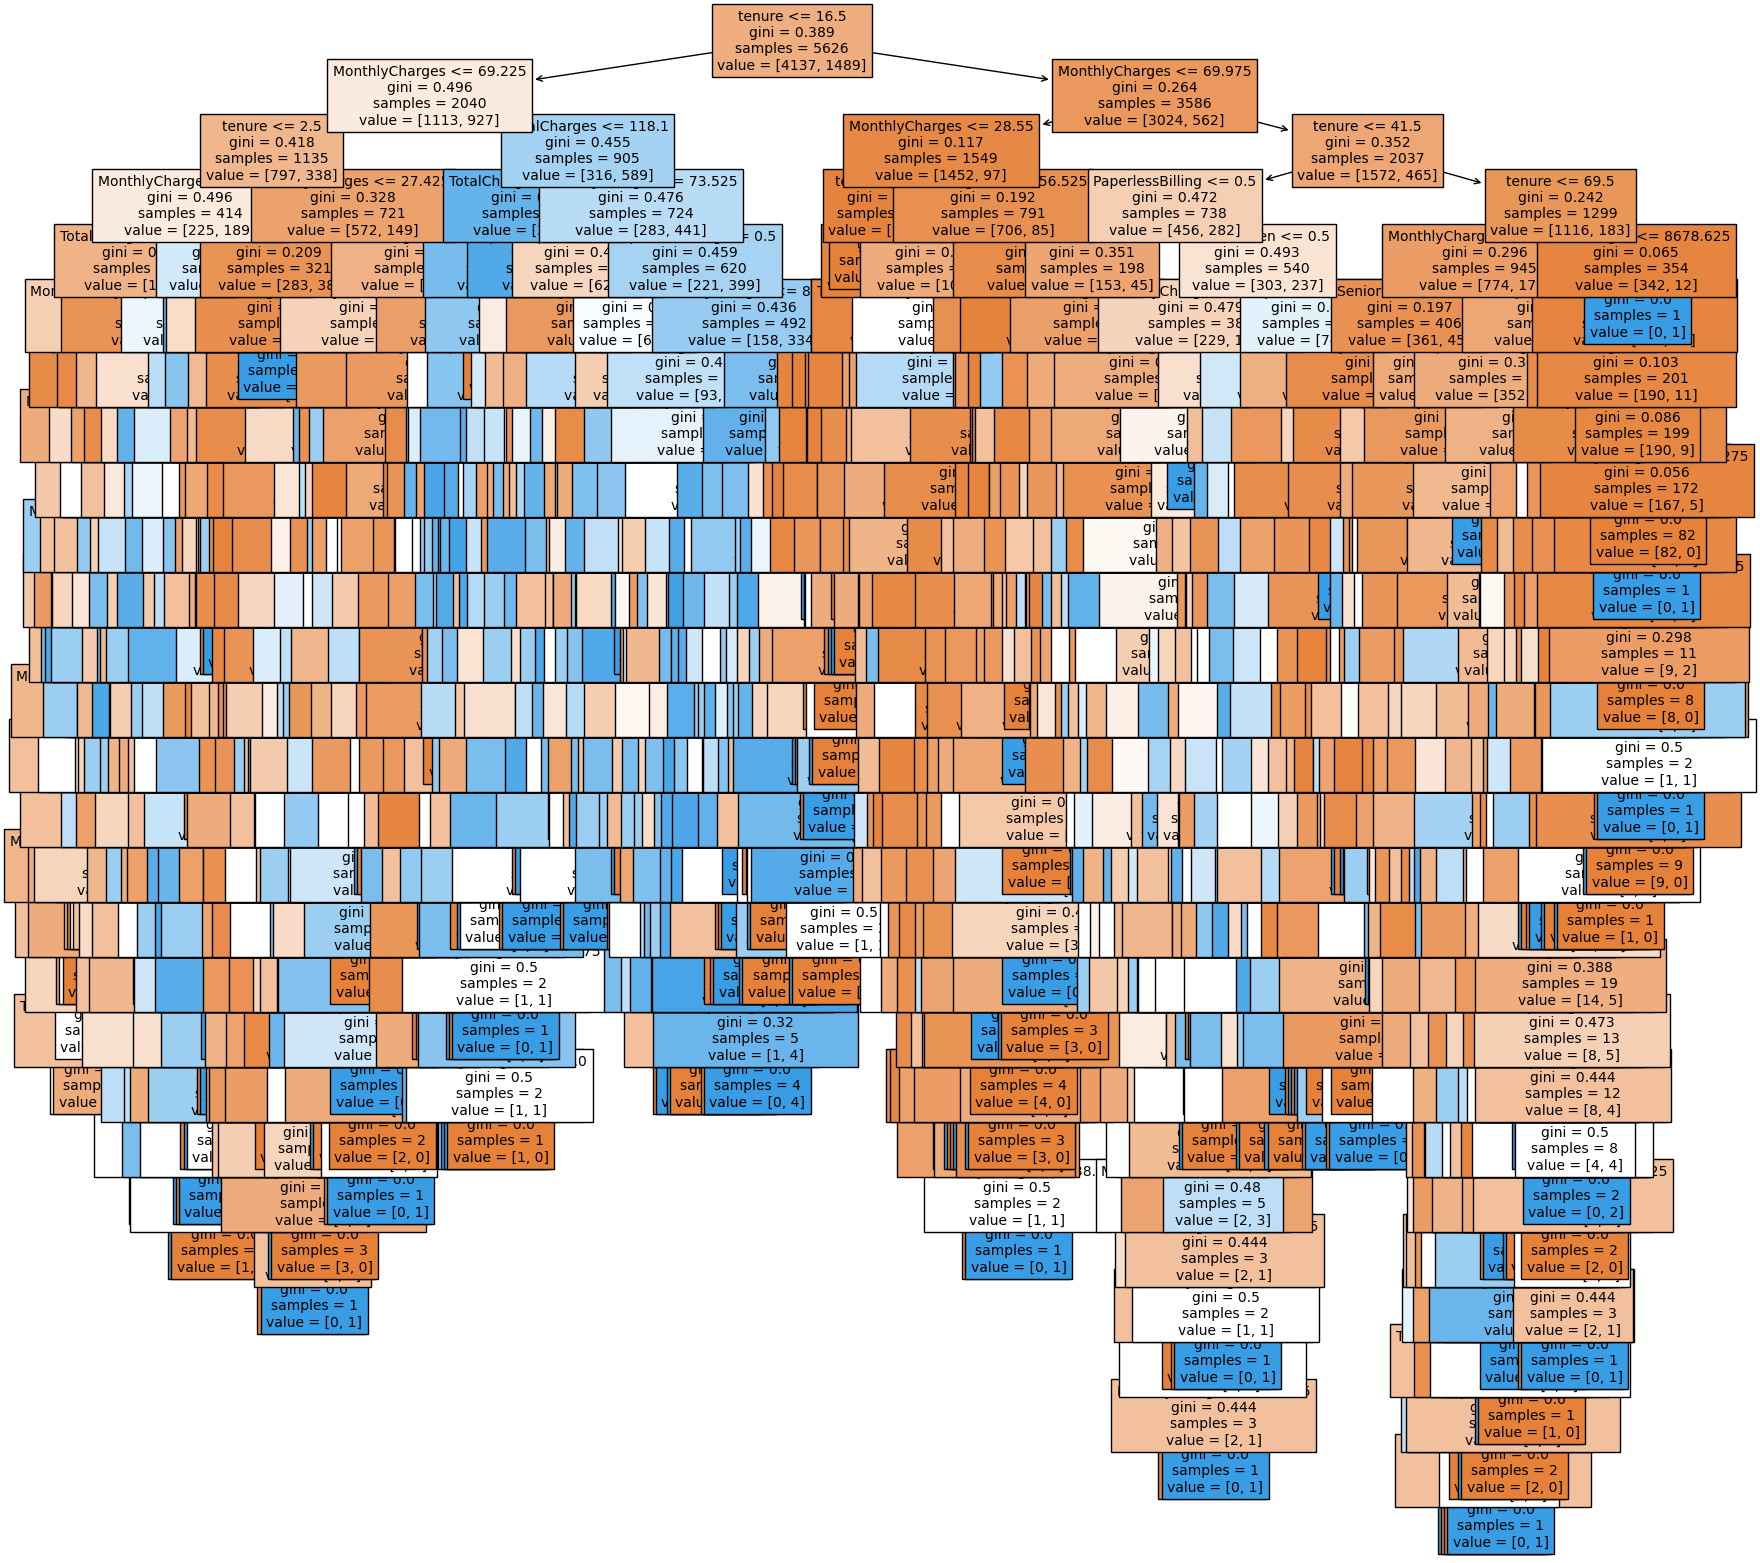

In [49]:
# 14. 트리 알고리즘 시각화하기

from sklearn.tree import plot_tree

plt.figure(figsize=(20,20))
tree = plot_tree(model,
                 feature_names = feature_names,
                 filled=True,
                 fontsize=10)

<Axes: >

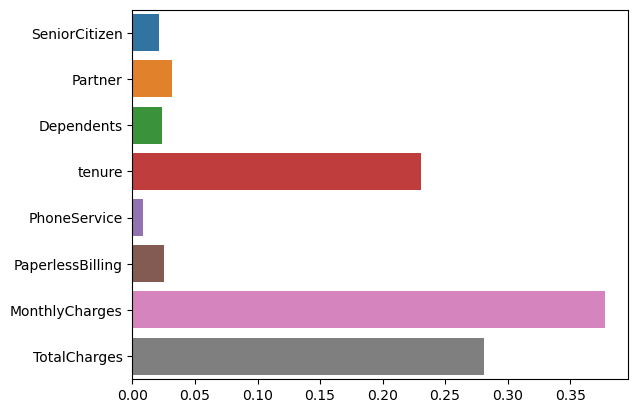

In [50]:
# 15. feature 중요도 측정 (바 그래프)

sns.barplot(x=model.feature_importances_, y=feature_names)

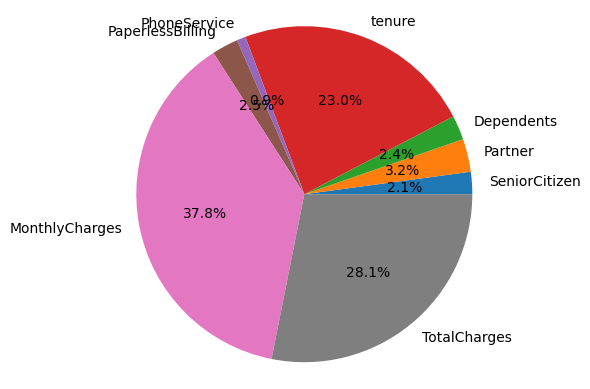

In [51]:
# 15 . 원 그래프

plt.pie(model.feature_importances_, labels=feature_names, autopct='%1.1f%%')
plt.axis('equal')

plt.show()

In [52]:
# 16. 정확도 측정
#       실제값 - 예측값 != 0이면 잘못 예측한 것

diff_count = abs(y_predict-y_test).sum()
diff_count

391

In [53]:
# 100점 만점에 몇점?

(len(y_test)-diff_count) / len(y_test) *100

72.19061166429587

In [54]:
# scikit 라이브러리를 통한 직접적인 정확도 분석

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict) *100

72.19061166429587

In [55]:
# decisionclassifier 모델 자체에서도 가능

model.score(X_test, y_test) * 100

72.19061166429587